In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [169]:
data_cancer = datasets.load_breast_cancer()
data = data_cancer.data
label = data_cancer.target
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size = 0.25, random_state = 0)
sc = StandardScaler()
sc.fit(train_data)
train_data_std = sc.transform(train_data)
test_data_std = sc.transform(test_data)

In [170]:
logistic_model = LogisticRegression()
logistic_model.fit(train_data_std, train_label)
print(logistic_model.score(train_data_std, train_label))
print(logistic_model.score(test_data_std, test_label) == accuracy_score(test_label, logistic_model.predict(test_data_std)))

0.9906103286384976
True


In [171]:
# accuracy_score is only used in classification problems, not used in regression problems
linear_model = LinearRegression()
linear_model.fit(train_data_std, train_label)
print(linear_model.score(train_data_std, train_label))
print(linear_model.score(test_data_std, test_label))

0.7824123695930644
0.729175870611405


In [172]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(train_data_std, train_label)
print(svm.score(train_data_std, train_label))
print(svm.score(test_data_std, test_label) == accuracy_score(test_label, svm.predict(test_data_std)))
# print(np.sum(svm.predict(test_data_std) == test_label)/test_label.shape[0])

0.9859154929577465
True


In [173]:
# decision_tree.score is r2_score, not accuracy_score.
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(train_data_std, train_label)
print(decision_tree.score(train_data_std, train_label))
print(decision_tree.score(test_data_std, test_label))
print(r2_score(test_label, decision_tree.predict(test_data_std)))
print(accuracy_score(test_label, decision_tree.predict(test_data_std)))
print(np.sum(decision_tree.predict(test_data_std) == test_label)/test_label.shape[0])

1.0
0.640251572327044
0.640251572327044
0.916083916083916
0.916083916083916


In [174]:
# naive_bayes.score is r2_score, not accuracy_score.
from sklearn.naive_bayes import GaussianNB
naive_bayes = DecisionTreeRegressor()
naive_bayes.fit(train_data_std, train_label)
print(naive_bayes.score(train_data_std, train_label))
print(naive_bayes.score(test_data_std, test_label))
print(r2_score(test_label, naive_bayes.predict(test_data_std)))
print(accuracy_score(test_label, naive_bayes.predict(test_data_std),sample_weight = None))
print(np.sum(naive_bayes.predict(test_data_std) == test_label)/test_label.shape[0])

1.0
0.6102725366876309
0.6102725366876309
0.9090909090909091
0.9090909090909091


In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_data_std, train_label)
print(knn.score(train_data_std, train_label))
print(knn.score(test_data_std, test_label) == accuracy_score(test_label, knn.predict(test_data_std)))

0.9835680751173709
True


In [176]:
print(train_data_std.shape)
print(train_label.reshape(-1,1).shape)

(426, 30)
(426, 1)


tutorial about how to build binary classifier using PyTorch: https://medium.com/analytics-vidhya/pytorch-for-deep-learning-binary-classification-logistic-regression-382abd97fb43

In [177]:
# binary classifier using pytorch 
import torch
import torch.nn as nn
class Net(nn.Module):
  def __init__(self, input_size, out_size):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(input_size, 64)
    self.fc2 = nn.Linear(64, 32)
    self.out = nn.Linear(32, out_size)
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.out(x))
    return x
input_size = train_data_std.shape[1]
out_size = 1
net = Net(input_size, out_size)
lr = 0.01
optim = torch.optim.SGD(net.parameters(), lr = lr)
loss_f = torch.nn.MSELoss()
train_data_std = train_data_std.astype(np.float32)
train_label = train_label.astype(np.float32)


losses, accuracies = [], []
for epo in range(1000):
  out = net(torch.from_numpy(train_data_std))
  loss = loss_f(out, torch.from_numpy(train_label.reshape(-1,1)))
  optim.zero_grad()
  loss.backward()
  optim.step()
  pre = out.reshape(-1).detach().numpy().round()
  target = train_label
  accuracy = np.sum(pre == target) / target.shape[0]
  losses.append(loss.item())
  accuracies.append(accuracy)
  if (epo % 100 == 0):
    # pre = torch.max(out, 1)[1].numpy()
    print("epoch {} loss: {} accuracy: {}".format(epo, round(loss.item(), 2), round(accuracy, 2)))
  

epoch 0 loss: 0.24 accuracy: 0.66
epoch 100 loss: 0.22 accuracy: 0.73
epoch 200 loss: 0.2 accuracy: 0.81
epoch 300 loss: 0.18 accuracy: 0.87
epoch 400 loss: 0.15 accuracy: 0.9
epoch 500 loss: 0.12 accuracy: 0.92
epoch 600 loss: 0.09 accuracy: 0.93
epoch 700 loss: 0.08 accuracy: 0.94
epoch 800 loss: 0.07 accuracy: 0.95
epoch 900 loss: 0.06 accuracy: 0.95


Text(0, 0.5, 'loss')

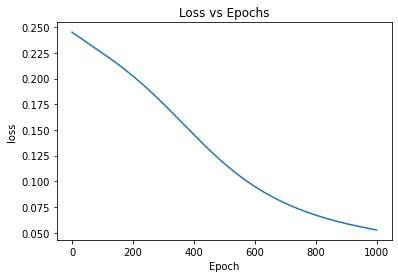

In [178]:
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')

Text(0, 0.5, 'Accuracy')

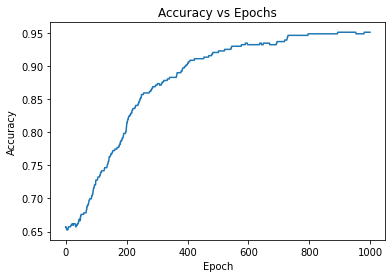

In [179]:
plt.plot(accuracies)
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [180]:
test_data_std = test_data_std.astype(np.float32)
test_label = test_label.astype(np.float32)
out = net(torch.from_numpy(test_data_std))
loss = loss_f(out, torch.from_numpy(test_label.reshape(-1,1)))
pre = out.reshape(-1).detach().numpy().round()
test_accuracy = np.sum(pre == test_label) / test_label.shape[0]
print(round(test_accuracy, 2))

0.95
